In [2]:
import pandas as pd
import numpy as np
import os

data = pd.read_csv("penguins_size.csv")
df = pd.DataFrame(data)

df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df_penguins = df.copy()

df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
# Prepare train and test data.

from sklearn.model_selection import StratifiedShuffleSplit

penguin_label = df_penguins['species']
penguin_predictor = df_penguins.drop(columns = ['species'])

StratShuffSplit = StratifiedShuffleSplit(n_splits=1, test_size = 0.25, random_state = 42)

for train_index, test_index in StratShuffSplit.split(penguin_predictor, penguin_label):
    print('train indices: ', train_index, ' \n\n test indices: ', test_index)
    train_set = df_penguins.loc[train_index]
    test_set = df_penguins.loc[test_index]

# Renaming train and test set.
# Use impute on the train set before using for training.
df_penguin_train = train_set.dropna(axis=0, subset=['sex']) # For this approach we remove sample with no labeled sex.
df_penguin_test = test_set # test set set has no null values.

df_penguin_train.reset_index(drop=True, inplace=True)
df_penguin_train

train indices:  [291 144 212  45  78 343 267  42  53 176 148 234 297 100  19  97  36 208
  13 200 117   2  86 231 114 150 331  89 260 101  18 162 125 113 273 109
 134 327  26 118   3  84 247 254 195   6 237  80 241  73 323  85 265 206
 197  32 328   5  27  98  81  96  47 250 282 311 165  62 307 286 240 128
 172 314 147 227 342 339 156 155 185 225  35 271 248  83  15 198  22 318
 104 308 283 218 177 141  38 264 152 304 310 163 105 112 336 249 211 270
 159 335  33 252 226  31  39 232  64 259  28   9 207 209 190 295  77  16
 169 186 124  51  68 219 175 213 266  56  40 220  34 223 279 126 268 215
  17 269 313 244 253  76 111 233 110  70 242 132 324 123 135  72 334 131
 284   8 325  69 143 315 340 285 258 203 189  44 298  95 228 319  25 136
   7 170 216 161 191  12  94 115 303  11  24 168  93 108 214 178 122 302
 138 229  55 341   4 192 293 300 290 188 184 217 277 154  49 224  29  63
 261 262 133 322   0  66 332  60  30 182  23 171 330 181 280 281 167 329
 296 276 145 245 301  43  67 127 25

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,46.4,15.6,221.0,5000.0,MALE
1,Adelie,Dream,37.3,16.8,192.0,3000.0,FEMALE
2,Chinstrap,Dream,51.9,19.5,206.0,3950.0,MALE
3,Adelie,Dream,39.6,18.8,190.0,4600.0,MALE
4,Adelie,Torgersen,36.2,16.1,187.0,3550.0,FEMALE
...,...,...,...,...,...,...,...
243,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE
244,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,MALE
245,Adelie,Torgersen,42.8,18.5,195.0,4250.0,MALE
246,Adelie,Torgersen,36.7,18.8,187.0,3800.0,FEMALE


In [10]:
# Notice that we have a sample whose sex is labeled '.'.

df_penguins.groupby(['species', 'sex']).agg('mean')

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species   sex                                                            
Adelie    FEMALE         37.257534        17.621918         187.794521   
          MALE           40.390411        19.072603         192.410959   
Chinstrap FEMALE         46.573529        17.588235         191.735294   
          MALE           51.094118        19.252941         199.911765   
Gentoo    .              44.500000        15.700000         217.000000   
          FEMALE         45.563793        14.237931         212.706897   
          MALE           49.473770        15.718033         221.540984   

                  body_mass_g  
species   sex                  
Adelie    FEMALE  3368.835616  
          MALE    4043.493151  
Chinstrap FEMALE  3527.205882  
          MALE    3938.970588  
Gentoo    .       4875.000000  
          FEMALE  4679.741379  
          MALE    5484.836066

In [12]:
# We need to remove the sample with sex labled by '.'.

drop_indices = []

for i in range(len(df_penguin_train['sex'])):
    if str(df_penguin_train.loc[i, ['sex']]['sex']) == '.':
        drop_indices.append(i)
        
drop_indices
df_penguin_train = df_penguin_train.drop(drop_indices, axis=0)
df_penguin_train.reset_index(drop=True, inplace=True)

df_penguin_train.groupby(['species', 'sex']).agg('mean')

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species   sex                                                            
Adelie    FEMALE         37.361818        17.672727         187.890909   
          MALE           40.622642        19.079245         192.018868   
Chinstrap FEMALE         46.578261        17.708696         192.000000   
          MALE           51.210714        19.282143         200.392857   
Gentoo    FEMALE         45.758140        14.204651         212.488372   
          MALE           49.811111        15.608889         221.400000   

                  body_mass_g  
species   sex                  
Adelie    FEMALE  3375.000000  
          MALE    4088.207547  
Chinstrap FEMALE  3508.695652  
          MALE    3970.535714  
Gentoo    FEMALE  4684.302326  
          MALE    5504.444444

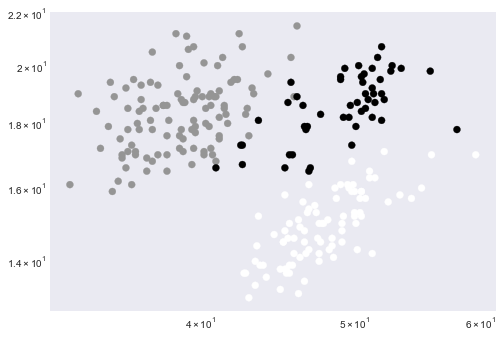

In [37]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# We explore the relationships of the following features.
culmen_length = list(df_penguin_train['culmen_length_mm'])
culmen_depth = list(df_penguin_train['culmen_depth_mm'])
body_mass = list(df_penguin_train['body_mass_g'])
species = list(df_penguin_train['species'])
sex = list(df_penguin_train['sex'])

# The following function will color code the list of samples in its input.
def penColor(sample_list):
    specie_list = dict()
    color_list = []
    color = 0
    ind = 0
    for specie in sample_list:
        if len(color_list) == 0:
            color_list.append(color)
            specie_list[specie] = color
            ind += 1
        if len(color_list) < 3 and specie != sample_list[ind-1]:
            color += 1
            specie_list[specie] = color
            color_list.append(color)
    
    return specie_list

def listColors(theList, color_dict):
    color_list = []
    for specie in theList:
        color_list.append(color_dict[specie])
    
    return color_list
    
plt.xscale('log')
plt.yscale('log')
plt.scatter(culmen_length, culmen_depth, c = listColors(species, penColor(species)))
plt.show()

#listColors(species, penColor(species))

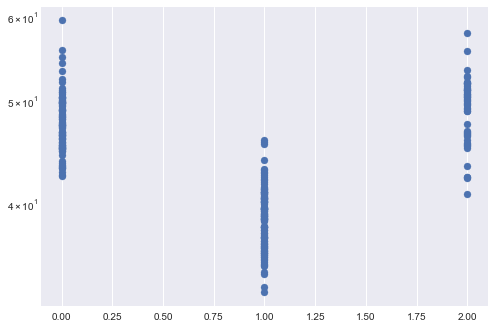

In [38]:
plt.yscale('log')
plt.scatter(listColors(species, penColor(species)), culmen_length)
plt.show()

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class CustomImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, sortby_attribs, impute_attribs, stat):
        
        assert type(sortby_attribs) == list or str
        assert type(impute_attribs) == list or str
        assert type(stat) == str
        #assert isinstance(impute_ref, pd.DataFrame) == True
        
        self.sortby_attribs = sortby_attribs
        self.impute_attribs = impute_attribs
        self.stat = stat
        #self.impute_ref = impute_ref
        
    def fit(self, X, y=None):
        assert pd.isnull(X[self.sortby_attribs]).any(axis=None) == False
        
        impute_reference = X.groupby(self.sortby_attribs).agg(self.stat)\
                                        .reset_index(drop=False)
        
        self.impute_ref = impute_reference
        
        return self
        
    def transform(self, X, y=None):
        
        check_is_fitted(self,'impute_ref')
        
        X = X.copy()
        
        for index, sample in self.impute_ref.iterrows():
            ind = (X[self.sortby_attribs] == sample[self.sortby_attribs]).all(axis=1) #Boolean-valued series indicating which row belongs to the grouping based on self.group_cols.
            for attrib in self.impute_attribs: # We iterate over the attributes we want to be imputed.
                X.loc[ind, [attrib]] = X.loc[ind, [attrib]].fillna(sample[[attrib]]) # We only impute entries with missing values.
                
        return X.values

In [42]:
# We create a simple transformer that removes all non-numeric columns.
# We also set index values for the following variables because the transformer spits an error if we "input" a string in it.

class filterNumeric(BaseEstimator, TransformerMixin):
    def __init__(self, categorical, Filter=True):
        assert type(categorical) == list or str
        
        self.Filter = Filter
        self.categorical = categorical
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.Filter == True:
            X = np.delete(X, obj = self.categorical, axis=1)
        return X

In [44]:
def get_colnames(input_df):
    colname_list = []
    for x in input_df:
        colname_list.append(x)
    return colname_list

In [47]:
custom_imputer = CustomImputer(sortby_attribs = ['species', 'sex'], 
                               impute_attribs = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], 
                               stat = 'mean')

df_penguin_train_tr = custom_imputer.fit_transform(df_penguin_train) # This is a numpy array.

filtNum = filterNumeric(categorical = [0,1,6])

filtNum_fitted = filtNum.fit_transform(df_penguin_train_tr) # This is a numpy array.

filtNum_tr = pd.DataFrame(filtNum_fitted, columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

filtNum_tr

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,46.4,15.6,221.0,5000.0
1,37.3,16.8,192.0,3000.0
2,51.9,19.5,206.0,3950.0
3,39.6,18.8,190.0,4600.0
4,36.2,16.1,187.0,3550.0
...,...,...,...,...
242,41.6,18.0,192.0,3950.0
243,51.5,16.3,230.0,5500.0
244,42.8,18.5,195.0,4250.0
245,36.7,18.8,187.0,3800.0


In [48]:
class DataTransformer(BaseEstimator, TransformerMixin):
        
    # The reason why we set it to true will be evident in the transform method below.
    # What the transformer method will do will depend on the boolean value of toTransform.
    
    def __init__(self, input_df_colnames, toTransform = True):
        
        #assert type(wanted_cols) == list or str
        assert type(input_df_colnames) == list or str
        
        #self.input_df = input_df
        self.input_df_colnames = input_df_colnames
        #self.wanted_cols = wanted_cols
        self.toTransform = toTransform
    
    # The fit method for this transformer does nothing.
    def fit(self, X, y=None):
        
        index_dic = {"culmen_length_mm": 0, "culmen_depth_mm": 0}
        
        for key in index_dic:
            for attrib in self.input_df_colnames:
                if key == attrib:
                    index_dic[key] = self.input_df_colnames.index(attrib)
                    
        
        self.index_dict = index_dic
        
        return self
    
    def transform(self, X, y = None):
        LenDepthRatio = X[:, self.index_dict['culmen_length_mm']]/X[:, self.index_dict['culmen_depth_mm']]
        if self.toTransform == True:
            return np.c_[X, LenDepthRatio]
        else:
            return X

In [49]:
# The pipelines.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

standard_scaler = StandardScaler()

ImputeTransform_pipeline = Pipeline(
    [('imputer', CustomImputer(impute_attribs = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                                                       sortby_attribs = ['species', 'sex'],
                                                       stat = 'mean')),
     ('get_numeric', filterNumeric(categorical = [0,1,6])),
     ('attrib_adder', DataTransformer(input_df_colnames = get_colnames(filtNum_tr))),
     ('feature_scaling', standard_scaler)
     ])

for_ImputeTransform = list(df_penguin_train)
nominal_attribs = ['island', 'sex']
ohe = OneHotEncoder(sparse=False)

full_pipeline = ColumnTransformer([("impute_transform", ImputeTransform_pipeline, for_ImputeTransform),
                                   ("OneHot_encode", ohe, nominal_attribs)])

preprocessed_data = full_pipeline.fit_transform(df_penguin_train)

preprocessed_data

array([[ 0.39378385, -0.78448991,  1.44356199, ...,  0.        ,
         0.        ,  1.        ],
       [-1.24956549, -0.18888845, -0.64579637, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.38701696,  1.15121483,  0.36285939, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.25633237,  0.65488028, -0.42965585, ...,  1.        ,
         0.        ,  1.        ],
       [-1.35791819,  0.80378065, -1.00603057, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.32154871,  0.8534141 , -0.42965585, ...,  0.        ,
         1.        ,  0.        ]])

In [50]:
# splitting independent variables from dependent variables.
penguin_Xtrain = pd.DataFrame(preprocessed_data)
penguin_Ytrain = ohe.fit_transform(df_penguin_train[['species']])

df_penguin_test_prepared = full_pipeline.transform(df_penguin_test)
penguin_Xtest = pd.DataFrame(df_penguin_test_prepared)
penguin_Ytest = ohe.fit_transform(df_penguin_test[['species']])

In [51]:
# splitting independent variables from dependent variables.
penguin_Xtrain = pd.DataFrame(preprocessed_data)
penguin_Ytrain = ohe.fit_transform(df_penguin_train[['species']])

df_penguin_test_prepared = full_pipeline.transform(df_penguin_test)
penguin_Xtest = pd.DataFrame(df_penguin_test_prepared)
penguin_Ytest = ohe.fit_transform(df_penguin_test[['species']])

In [53]:
# Picking a model and training it.

from sklearn.neighbors import KNeighborsClassifier

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(penguin_Xtrain, penguin_Ytrain)

KNeighborsClassifier()

In [54]:
from sklearn.metrics import accuracy_score

y_pred = KNNclassifier.predict(penguin_Xtest)

acc = accuracy_score(penguin_Ytest, y_pred)
acc

0.9883720930232558